In [165]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt  # For 2D visualization
import seaborn as sns
import numpy as np

In [264]:
train_data = pd.read_csv("datasets/train.csv")
test_data = pd.read_csv('datasets/test.csv')
merged_data = pd.concat([train_data, test_data], ignore_index = True)


/home/johnson/python_venv/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [266]:
merged_data.head

<bound method DataFrame.head of       1stFlrSF  2ndFlrSF  3SsnPorch Alley  BedroomAbvGr BldgType BsmtCond  \
0          856       854          0   NaN             3     1Fam       TA   
1         1262         0          0   NaN             3     1Fam       TA   
2          920       866          0   NaN             3     1Fam       TA   
3          961       756          0   NaN             3     1Fam       Gd   
4         1145      1053          0   NaN             4     1Fam       TA   
5          796       566        320   NaN             1     1Fam       TA   
6         1694         0          0   NaN             3     1Fam       TA   
7         1107       983          0   NaN             3     1Fam       TA   
8         1022       752          0   NaN             2     1Fam       TA   
9         1077         0          0   NaN             2   2fmCon       TA   
10        1040         0          0   NaN             3     1Fam       TA   
11        1182      1142          0   NaN   

In [168]:
train_data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [169]:
def outliers(variable):
    # Calculate 1st, 3rd quartiles and iqr.
    q1, q3 = variable.quantile(0.25), variable.quantile(0.75)
    iqr = q3 - q1
    # Calculate lower fence and upper fence for outliers
    l_fence, u_fence = q1 - 1.5*iqr , q3 + 1.5*iqr   # Any values less than l_fence and greater than u_fence are outliers.
    # Observations that are outliers
    outliers = variable[(variable<l_fence) | (variable>u_fence)]
    print('Total Outliers of', variable.name,':', outliers.count())
    # Drop obsevations that are outliers
    filtered = variable.drop(outliers.index, axis = 0)
    # Create subplots
    fig, (ax1, ax2) = plt.subplots(2,1)
    # Gives space between two subplots
    fig.subplots_adjust(hspace = 1) 
    # Plot variable with outliers
    variable.plot.box(vert = False, color = 'coral', grid = False, ax = ax1, title = 'Distribution with Outliers for %s' %variable.name)
    # Plot variable without outliers
    filtered.plot.box(vert = False, color = 'coral', grid = False, ax = ax2, title = 'Distribution without Outliers for %s' %variable.name)


('Total Outliers of', 'SalePrice', ':', 61)


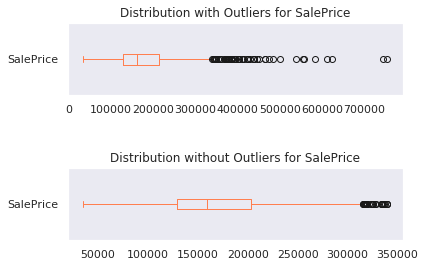

In [170]:
outliers(train_data.SalePrice)

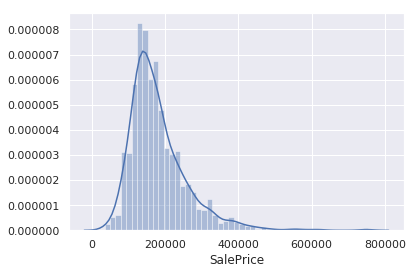

In [171]:
sns.distplot(train_data.SalePrice)

In [172]:
from collections import Counter
new_alley = train_data.Alley.fillna('None')
recounted = Counter(new_alley)


In [173]:
'''To analyse categorical variables, we will create three custom functions.
The first two functions displays bar labels in absolute and relative scale respectively. And the 3rd one creates a dataframe of absolute and relative and also generates abs and relative frequency plot for each variable.'''

''' #1.Function for displaying bar labels in absolute scale.'''
def abs_bar_labels():
    plt.ylabel('Absolute Frequency')
    plt.xticks(rotation = 0)
    plt.yticks([])
    # Set individual bar lebels in absolute number
    for x in ax.patches:
        ax.annotate(x.get_height(), 
        (x.get_x() + x.get_width()/2., x.get_height()), ha = 'center', va = 'center', xytext = (0, 7), 
        textcoords = 'offset points', fontsize = 14, color = 'black')
    
'''#2.Function for displaying bar lebels in relative scale.'''
def pct_bar_labels():
    plt.ylabel('Relative Frequency (%)')
    plt.xticks(rotation = 0)
    plt.yticks([])   
    # Set individual bar lebels in proportional scale
    for x in ax1.patches:
        ax1.annotate(str(x.get_height()) + '%', 
        (x.get_x() + x.get_width()/2., x.get_height()), ha = 'center', va = 'center', xytext = (0, 7), 
        textcoords = 'offset points', fontsize = 14, color = 'black')
         
'''#3.Function to create a dataframe of absolute and relative frequency of each variable. And plot absolute and relative frequency.'''
def absolute_and_relative_freq(variable):
    global  ax, ax1 
    # Dataframe of absolute and relative frequency
    absolute_frequency = variable.value_counts()
    # Will be multiplied by 100 and rounded to 2 decimal points for percentage
    relative_frequency = np.round(variable.value_counts(normalize = True)*100, 2) 
    df = pd.DataFrame({'Absolute Frequency':absolute_frequency, 'Relative Frequency(%)':relative_frequency})
    # This portion plots absolute frequency with bar labeled.
    ax =  absolute_frequency.plot.bar()
    plt.title('Absolute Frequency of %s' %variable.name) # Prints variable name as title in matplotlib
    abs_bar_labels()  # Displays bar labels in abs scale.
    plt.show()
    # This portion plots relative frequency with bar labeled.
    ax1 = relative_frequency.plot.bar()
    plt.title('Relative Frequency of %s' %variable.name)
    pct_bar_labels()
    plt.show()
    print('Absolute & Relative Frequency of',variable.name,':')
    return display(df)

In [174]:
train_data.columns

Index([u'Id', u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea',
       u'Street', u'Alley', u'LotShape', u'LandContour', u'Utilities',
       u'LotConfig', u'LandSlope', u'Neighborhood', u'Condition1',
       u'Condition2', u'BldgType', u'HouseStyle', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'RoofStyle',
       u'RoofMatl', u'Exterior1st', u'Exterior2nd', u'MasVnrType',
       u'MasVnrArea', u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual',
       u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1',
       u'BsmtFinType2', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF',
       u'Heating', u'HeatingQC', u'CentralAir', u'Electrical', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'KitchenQual', u'TotRmsAbvGrd', u'Functional',
       u'Fireplaces', u'FireplaceQu', u'GarageType', u'GarageYrBlt',
       u'GarageFinish',

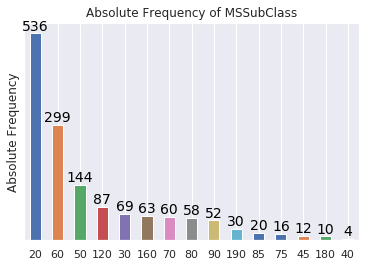

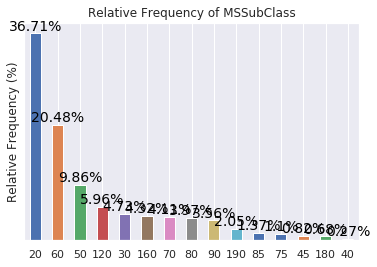

('Absolute & Relative Frequency of', 'MSSubClass', ':')


,Absolute Frequency,Relative Frequency(%)
20,536,36.71
60,299,20.48
50,144,9.86
120,87,5.96
30,69,4.73
160,63,4.32
70,60,4.11
80,58,3.97
90,52,3.56
190,30,2.05


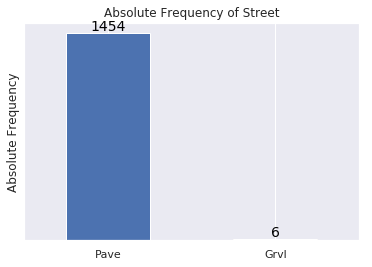

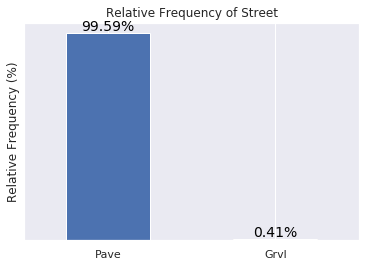

('Absolute & Relative Frequency of', 'Street', ':')


,Absolute Frequency,Relative Frequency(%)
Pave,1454,99.59
Grvl,6,0.41


In [175]:
absolute_and_relative_freq(train_data.MSSubClass)
absolute_and_relative_freq(train_data.Street)

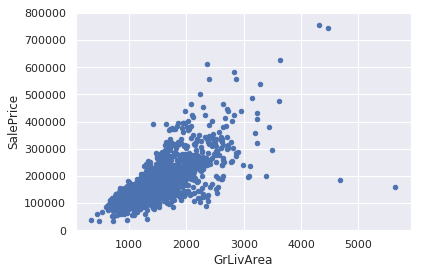

In [176]:
var = 'GrLivArea'
train_data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))


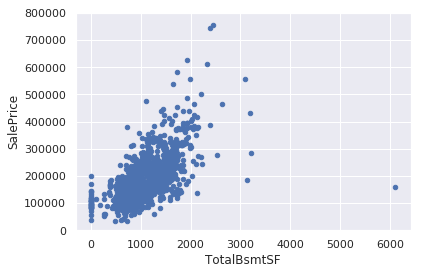

In [177]:
var = 'TotalBsmtSF'
train_data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))


(-0.5, 9.5, 0, 800000)

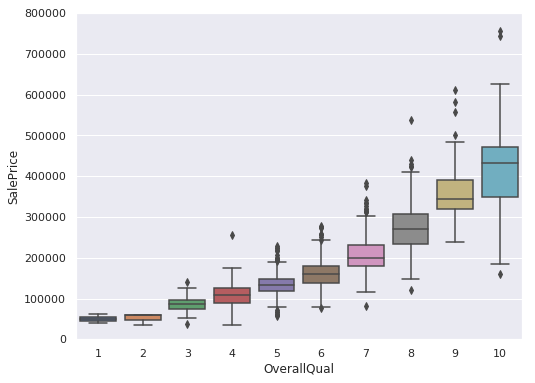

In [178]:
var = 'OverallQual'
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=train_data)
fig.axis(ymin=0, ymax=800000)

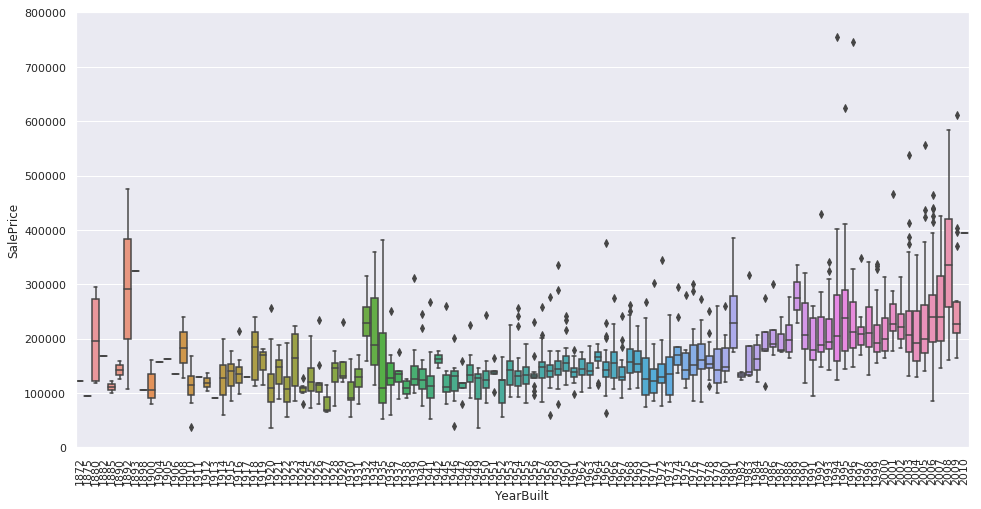

In [179]:
var = 'YearBuilt'
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=train_data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

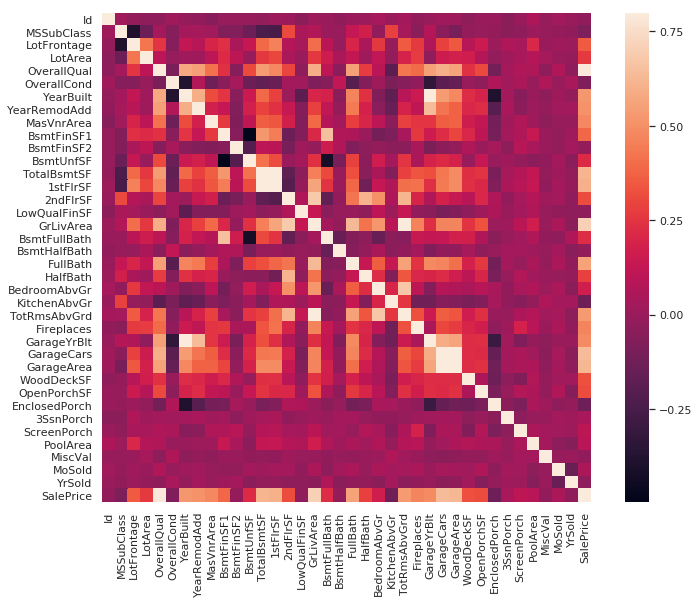

In [180]:
corrmat = train_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);


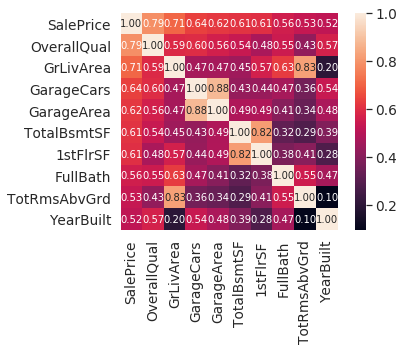

In [181]:
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

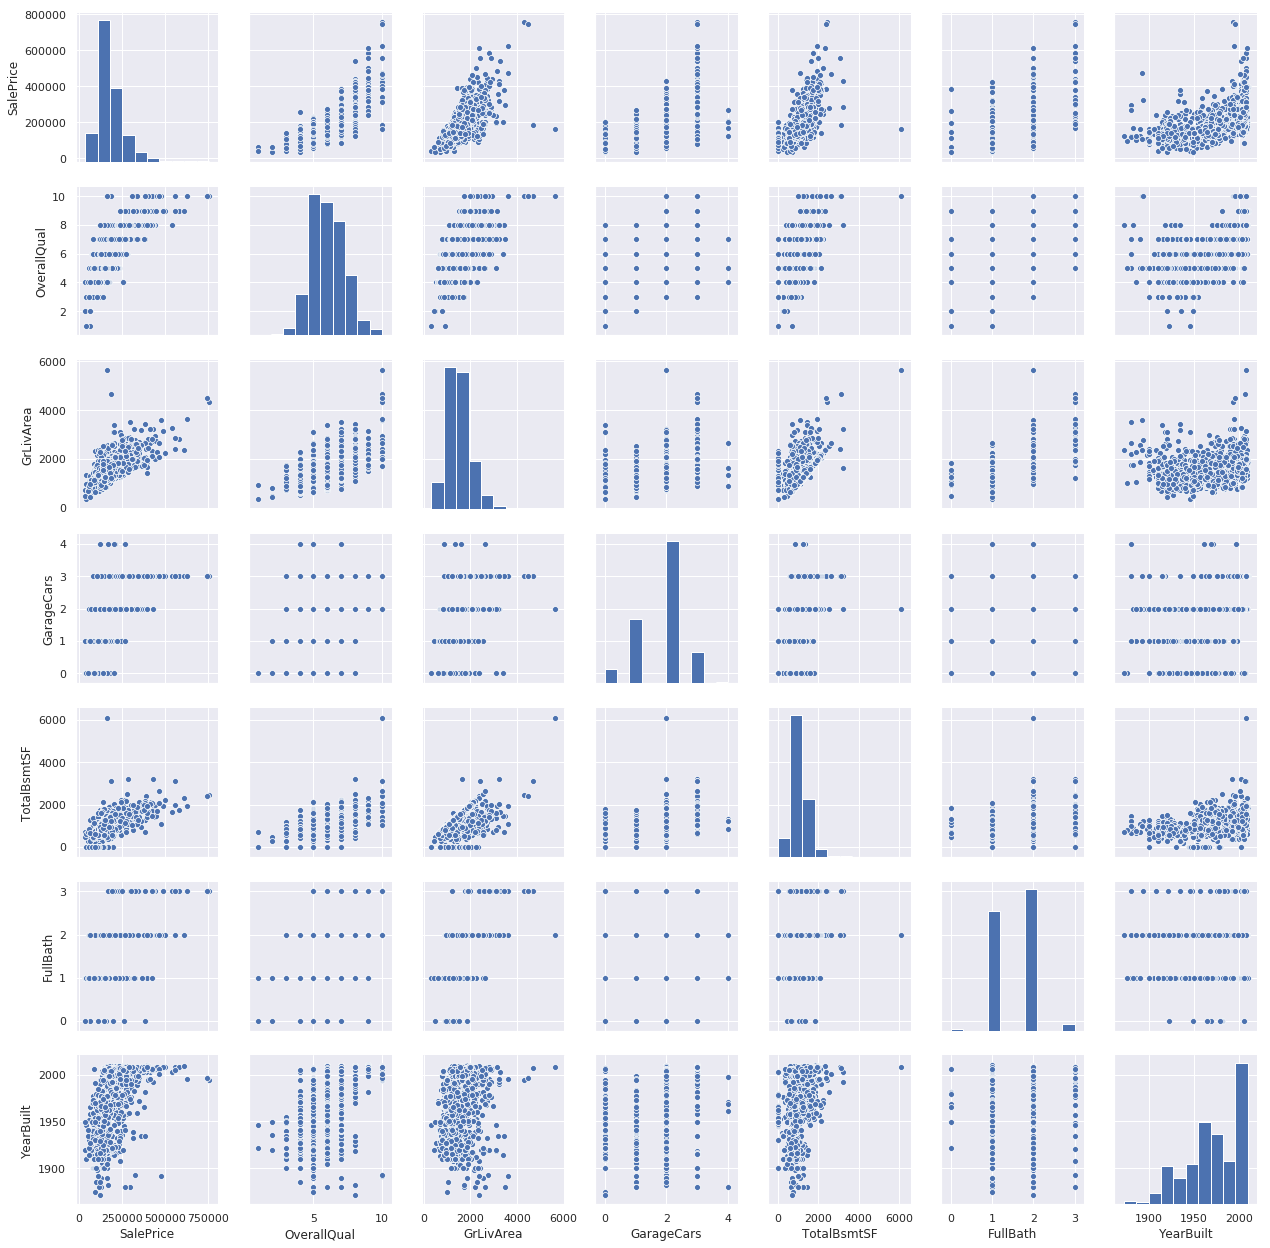

In [182]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train_data[cols], size = 2.5)
plt.show();


In [243]:
total = train_data.isnull().sum().sort_values(ascending=False)
percent = (train_data.isnull().sum()/train_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)


,Total,Percent
SalePrice,0,0.0
Heating,0,0.0
RoofStyle,0,0.0
RoofMatl,0,0.0
Exterior1st,0,0.0
Exterior2nd,0,0.0
MasVnrType,0,0.0
MasVnrArea,0,0.0
ExterQual,0,0.0
ExterCond,0,0.0


In [212]:
merged_data.loc[train_data['PoolArea'] == 0, 'PoolQC']='NAN'

In [233]:
merged_data.Fence.fillna("NAN",inplace=True)
merged_data.MiscVal.fillna("NAN", inplace=True)
merged_data.scFeature.fillna("NAN", inplace=True)

merged_data.Alley.fillna("NAN", inplace=True)
merged_data.BsmtQual.fillna("NAN", inplace=True)
merged_data.BsmtCond.fillna("NAN", inplace=True)
merged_data.BsmtExposure.fillna("NAN", inplace=True)
merged_data.BsmtFinType1.fillna("NAN", inplace=True)
merged_data.BsmtFinType2.fillna("NAN", inplace=True)
merged_data.FireplaceQu.fillna("NAN", inplace=True)
merged_data.GarageType.fillna("NAN", inplace=True)
merged_data.GarageFinish.fillna("NAN", inplace=True)
merged_data.GarageQual.fillna("NAN", inplace=True)
merged_data.GarageCond.fillna("NAN", inplace=True)
merged_data.LotFrontage.fillna(0, inplace=True)


In [241]:
merged_data.GarageYrBlt.fillna(train_data.GarageYrBlt.median, inplace=True)
merged_data.MasVnrType.fillna("None", inplace=True)
merged_data.MasVnrArea.fillna(0, inplace=True)

merged_data.Electrical.fillna('SBrkr', inplace=True)

In [242]:
train_data.Electrical.value_counts()

SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [250]:
train_data.columns

Index([u'Id', u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea',
       u'Street', u'Alley', u'LotShape', u'LandContour', u'Utilities',
       u'LotConfig', u'LandSlope', u'Neighborhood', u'Condition1',
       u'Condition2', u'BldgType', u'HouseStyle', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'RoofStyle',
       u'RoofMatl', u'Exterior1st', u'Exterior2nd', u'MasVnrType',
       u'MasVnrArea', u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual',
       u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1',
       u'BsmtFinType2', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF',
       u'Heating', u'HeatingQC', u'CentralAir', u'Electrical', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'KitchenQual', u'TotRmsAbvGrd', u'Functional',
       u'Fireplaces', u'FireplaceQu', u'GarageType', u'GarageYrBlt',
       u'GarageFinish',

In [302]:
import xgboost as xgb
merged_data = pd.get_dummies(merged_data)
train_data=merged_data.loc[merged_data['SalePrice'].notnull()]
train_data.pop('Id')
training_y = train_data.pop('SalePrice')

test_data = merged_data.loc[merged_data['SalePrice'].isnull()]
test_data.pop("SalePrice")
ids = test_data.pop('Id')


In [303]:
train_data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa
0,856,854,0,3,706.0,0.0,1.0,0.0,150.0,0,...,0,0,0,0,0,1,0,1,1,0
1,1262,0,0,3,978.0,0.0,0.0,1.0,284.0,0,...,0,0,0,0,0,1,0,1,1,0
2,920,866,0,3,486.0,0.0,1.0,0.0,434.0,0,...,0,0,0,0,0,1,0,1,1,0
3,961,756,0,3,216.0,0.0,1.0,0.0,540.0,272,...,0,0,0,0,0,1,0,1,1,0
4,1145,1053,0,4,655.0,0.0,1.0,0.0,490.0,0,...,0,0,0,0,0,1,0,1,1,0


In [304]:
test_data.head()


,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa
1460,896,0,0,2,468.0,144.0,0.0,0.0,270.0,0,...,0,0,0,0,0,1,0,1,1,0
1461,1329,0,0,3,923.0,0.0,0.0,0.0,406.0,0,...,0,0,0,0,0,1,0,1,1,0
1462,928,701,0,3,791.0,0.0,0.0,0.0,137.0,0,...,0,0,0,0,0,1,0,1,1,0
1463,926,678,0,3,602.0,0.0,0.0,0.0,324.0,0,...,0,0,0,0,0,1,0,1,1,0
1464,1280,0,0,2,263.0,0.0,0.0,0.0,1017.0,0,...,0,0,0,0,0,1,0,1,1,0


In [305]:
xgdmat = xgb.DMatrix(training_data, training_y) # Create our DMatrix to make XGBoost more efficient

our_params = {'eta': 0.1, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 'n_estimators':100,
             'objective': 'gpu:reg:linear', 'eval_metric':'rmse','max_depth':5, 'min_child_weight':1} 
clf = xgb.XGBModel(**our_params)

clf.fit(train_data, training_y, verbose=True)




XGBModel(base_score=0.5, booster='gbtree', colsample_bylevel=1,
     colsample_bytree=0.8, eta=0.1, eval_metric='rmse', gamma=0,
     learning_rate=0.1, max_delta_step=0, max_depth=5, min_child_weight=1,
     missing=None, n_estimators=100, n_jobs=1, nthread=None,
     objective='gpu:reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
     scale_pos_weight=1, seed=0, silent=True, subsample=0.8)

In [308]:
predictions = clf.predict(test_data)
submission = pd.DataFrame({"Id": ids, "SalePrice": predictions})
submission.to_csv("submission.csv", index=False)

#print(explained_variance_score(predictions,training_y))



In [298]:
print predictions

[125264.17 157159.7  181903.61 ... 166729.66 110299.92 216769.27]
